In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import matplotlib.dates as mdates

In [2]:
#https://academic.udayton.edu/kissock/http/Weather/gsod95-current/PLWARSAW.txt
#https://academic.udayton.edu/kissock/http/Weather/gsod95-current/POLISBON.txt

In [3]:
fWAR = open("WARSZAWA.txt", 'r', encoding='utf-8')
textWAR=fWAR.read().split()
fWAR.close()
fLIS = open("LISBONA.txt", 'r', encoding='utf-8')
textLIS=fLIS.read().split()
fLIS.close()

In [4]:
LWAR=list(textWAR)
LLIS=list(textLIS)
del LWAR[0:(len(LWAR)-(360*4))] #usuwam wszystkie dane poza tymi z ostatnich 360 dni 
#(kazdy dzien ma 4 dane: dzien miesiac rok temp)
del LLIS[0:(len(LLIS)-(360*4))]

In [5]:
Dzien=[]
Miesiac=[]
Rok=[]
TemperaturaWAR=[]
TemperaturaLIS=[]
for i in range (0,len(LWAR)):
    if (i)%4==0: Miesiac.append(LWAR[i])
    if (i+3)%4==0: Dzien.append(LWAR[i])
    if (i+2)%4==0: Rok.append(LWAR[i])
    if (i+1)%4==0: TemperaturaWAR.append(LWAR[i])
for i in range(0, len(LLIS)):
    if (i+1)%4==0: TemperaturaLIS.append(LLIS[i])

In [6]:
#poniewaz niektore temperatury to -99, zakladam ze nie bylo pomiaru i zastepuje ta liczbe srednia arytmetyczna dwoch innych dni
for i in range(0, len(TemperaturaLIS)):
    if TemperaturaLIS[i]=="-99": TemperaturaLIS[i]=str((float(TemperaturaLIS[i+1])+float(TemperaturaLIS[i-1]))/2)
for i in range(0, len(TemperaturaWAR)):
    if TemperaturaWAR[i]=="-99": TemperaturaWAR[i]=str((float(TemperaturaWAR[i+1])+float(TemperaturaWAR[i-1]))/2)

In [7]:
def FarenheitToCelsius(L):
    for i in range (0,len(L)): 
            L[i]=float(L[i])
            L[i]=round((L[i]-32)*5/9,2)    

In [8]:
FarenheitToCelsius(TemperaturaWAR)
FarenheitToCelsius(TemperaturaLIS)

In [9]:
for i in range(0, len(TemperaturaLIS)):
    TemperaturaLIS[i]=float(TemperaturaLIS[i])
for i in range (0,len(TemperaturaWAR)):
    TemperaturaWAR[i]=float(TemperaturaWAR[i])
TemperaturaWAR=np.array(TemperaturaWAR)
TemperaturaLIS=np.array(TemperaturaLIS)

In [10]:
RoznicaWARLIS=[]
RoznicaLISWAR=[]
for i in range(0, len(TemperaturaLIS)):
    if TemperaturaWAR[i]>=TemperaturaLIS[i]:
        RoznicaWARLIS.append(TemperaturaWAR[i]-TemperaturaLIS[i])
for i in range(0, len(TemperaturaLIS)):
    if TemperaturaLIS[i]>TemperaturaWAR[i]:
        RoznicaLISWAR.append(TemperaturaLIS[i]-TemperaturaWAR[i])
for i in range(0, len(TemperaturaLIS)):
    if TemperaturaWAR[i]>=TemperaturaLIS[i] and TemperaturaWAR[i]-TemperaturaLIS[i]==max(RoznicaWARLIS):
        roznicadniWARLIS=i-1
    elif TemperaturaLIS[i]>TemperaturaWAR[i] and TemperaturaLIS[i]-TemperaturaWAR[i]==max(RoznicaLISWAR):
        roznicadniLISWAR=i-1

In [11]:
dates1=[]
for i in range (0, len(Rok)):
    dates1.append(str(Dzien[i]) + '/' + str(Miesiac[i]) + '/' + str(Rok[i]))
czas = [dt.datetime.strptime(d,'%d/%m/%Y').date() for d in dates1]

dzienLISWAR=czas[0]+dt.timedelta(roznicadniLISWAR)
dzienWARLIS=czas[0]+dt.timedelta(roznicadniWARLIS)

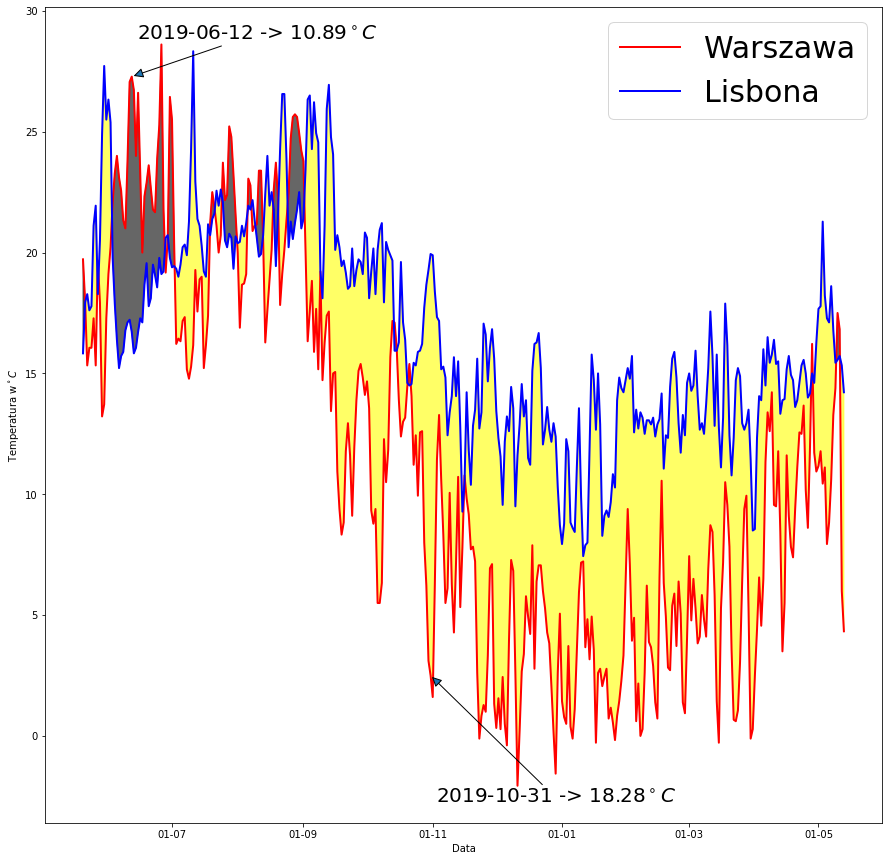

In [13]:
fig, ax=plt.subplots(figsize=(15,15))

date_form = mdates.DateFormatter("%d-%m")
ax.xaxis.set_major_formatter(date_form)

ax.plot(czas, TemperaturaWAR, color="red", linewidth=2, label="Warszawa")
ax.plot(czas, TemperaturaLIS, color="blue", linewidth=2, label="Lisbona")

ax.fill_between(czas, TemperaturaWAR, TemperaturaLIS, where=(TemperaturaWAR>TemperaturaLIS), color="black", 
                interpolate=True, alpha=0.6)
ax.fill_between(czas, TemperaturaWAR, TemperaturaLIS ,where=(TemperaturaWAR<=TemperaturaLIS), color="yellow", 
                interpolate=True, alpha=0.6)

ax.annotate(str(dzienWARLIS) + " -> " + str(round(max(RoznicaWARLIS), 2)) + r'$^\circ C$' , 
            (mdates.date2num(dzienWARLIS), TemperaturaWAR[roznicadniWARLIS]), 
            xytext=(5, TemperaturaWAR[roznicadniWARLIS]+10), 
            textcoords='offset points', arrowprops=dict(arrowstyle='-|>'), fontsize=20)
ax.annotate(str(dzienLISWAR) + " -> " + str(round(max(RoznicaLISWAR), 2)) + r'$^\circ C$' , 
            (mdates.date2num(dzienLISWAR), TemperaturaWAR[roznicadniLISWAR]), 
            xytext=(5, TemperaturaWAR[roznicadniLISWAR]-130), 
            textcoords='offset points', arrowprops=dict(arrowstyle='-|>'), fontsize=20)

plt.xlabel("Data")
plt.ylabel("Temperatura w" r'$^\circ C$')

ax.legend(prop={'size': 30})
plt.savefig("07_mac_273926.svg")
plt.show()